****Analyzing US Medicare Claims to Identify Cost Gaps & Procedure Trends****

**Objective**
Analyze billing and reimbursement trends across provider types and services using Medicare claims data. Explore cost discrepancies, provider behaviors, and service utilization.

In [1]:
#import libraries
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker

In [2]:
data=pd.read_excel("Healthcare Providers.xlsx")

data.head()

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27.0,24,27,200.587778,305.211111,157.262222,160.908889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175.0,175,175,123.730000,548.800000,118.830000,135.315257
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32.0,13,32,90.650000,155.000000,64.439688,60.595937
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20.0,18,20,3.500000,5.000000,3.430000,3.430000
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33.0,24,31,26.520000,40.000000,19.539394,19.057576


In [3]:
#data exploration
print("data shape:", data.shape)
print("columns:\n", data.columns)

data shape: (100000, 27)
columns:
 Index(['index', 'National Provider Identifier',
       'Last Name/Organization Name of the Provider',
       'First Name of the Provider', 'Middle Initial of the Provider',
       'Credentials of the Provider', 'Gender of the Provider',
       'Entity Type of the Provider', 'Street Address 1 of the Provider',
       'Street Address 2 of the Provider', 'City of the Provider',
       'Zip Code of the Provider', 'State Code of the Provider',
       'Country Code of the Provider', 'Provider Type',
       'Medicare Participation Indicator', 'Place of Service', 'HCPCS Code',
       'HCPCS Description', 'HCPCS Drug Indicator', 'Number of Services',
       'Number of Medicare Beneficiaries',
       'Number of Distinct Medicare Beneficiary/Per Day Services',
       'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
       'Average Medicare Payment Amount',
       'Average Medicare Standardized Amount'],
      dtype='object')


In [4]:
print("Null coloumns:\n" , data.isnull().sum())

Null coloumns:
 index                                                           0
National Provider Identifier                                    0
Last Name/Organization Name of the Provider                     0
First Name of the Provider                                   4255
Middle Initial of the Provider                              29331
Credentials of the Provider                                  7209
Gender of the Provider                                       4254
Entity Type of the Provider                                     0
Street Address 1 of the Provider                                0
Street Address 2 of the Provider                            59363
City of the Provider                                            0
Zip Code of the Provider                                        0
State Code of the Provider                                      0
Country Code of the Provider                                    0
Provider Type                                               

In [5]:
print("Object type\n", data.dtypes)

Object type
 index                                                         int64
National Provider Identifier                                  int64
Last Name/Organization Name of the Provider                  object
First Name of the Provider                                   object
Middle Initial of the Provider                               object
Credentials of the Provider                                  object
Gender of the Provider                                       object
Entity Type of the Provider                                  object
Street Address 1 of the Provider                             object
Street Address 2 of the Provider                             object
City of the Provider                                         object
Zip Code of the Provider                                      int64
State Code of the Provider                                   object
Country Code of the Provider                                 object
Provider Type                      

DATA CLEANING

In [6]:
#standardizing the columns
data.columns=data.columns.str.strip()

In [7]:
#Cleaning and converting
cost_cols=[
    "Average Medicare Allowed Amount",
    "Average Submitted Charge Amount",
    "Average Medicare Payment Amount",
    "Average Medicare Standardized Amount"
]
for col in cost_cols:
    data[col]=pd.to_numeric(data[col], errors="coerce")

data['Number of Services'] = pd.to_numeric(data['Number of Services'], errors='coerce')
data['Number of Medicare Beneficiaries'] = pd.to_numeric(data['Number of Medicare Beneficiaries'], errors='coerce')


In [8]:
data.dtypes

index                                                         int64
National Provider Identifier                                  int64
Last Name/Organization Name of the Provider                  object
First Name of the Provider                                   object
Middle Initial of the Provider                               object
Credentials of the Provider                                  object
Gender of the Provider                                       object
Entity Type of the Provider                                  object
Street Address 1 of the Provider                             object
Street Address 2 of the Provider                             object
City of the Provider                                         object
Zip Code of the Provider                                      int64
State Code of the Provider                                   object
Country Code of the Provider                                 object
Provider Type                                   

In [9]:
#Calculating cost gap - # Cost Gap = What the provider billed - what Medicare actually paid
data["Average Cost Gap"]= data["Average Submitted Charge Amount"]- data["Average Medicare Payment Amount"]
# Total gap across all services
data['Total Cost Gap'] = data['Average Cost Gap'] * data['Number of Services']
data.head()

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Average Cost Gap,Total Cost Gap
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,N,27.0,24,27,200.587778,305.211111,157.262222,160.908889,147.948889,3994.62
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,N,175.0,175,175,123.730000,548.800000,118.830000,135.315257,429.970000,75244.75
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,N,32.0,13,32,90.650000,155.000000,64.439688,60.595937,90.560312,2897.93
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,N,20.0,18,20,3.500000,5.000000,3.430000,3.430000,1.570000,31.40
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,N,33.0,24,31,26.520000,40.000000,19.539394,19.057576,20.460606,675.20


In [10]:
#calculating average services per beneficiary
#Utilization Ratio = Number of services provided per beneficiary (helps understand care intensity)
data["Utilization Ratio"]=data["Number of Services"]/ data["Number of Medicare Beneficiaries"]
data["Utilization Ratio"]

0        1.125000
1        1.000000
2        2.461538
3        1.111111
4        1.375000
           ...   
99995    1.000000
99996    1.271028
99997    1.000000
99998    1.000000
99999    7.750000
Name: Utilization Ratio, Length: 100000, dtype: float64

In [11]:
# Total Medicare Payment = how much Medicare paid in total for this service by this provider
data['Total Medicare Payment'] = data['Average Medicare Payment Amount'] * data['Number of Services']

Visualization

In [12]:
top_procedures = (
    data.groupby('HCPCS Code')
    ['Number of Services']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_procedures


HCPCS Code
99214    1047131.5
J1439     980628.0
Q9967     974323.1
99213     962558.0
A0425     919165.2
Q0138     703133.0
J1071     572983.0
97110     561086.3
99232     479089.0
J0897     422932.0
Name: Number of Services, dtype: float64

C:\Users\Dell\AppData\Local\Temp\ipykernel_12240\76721170.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_procedures.values, y=top_procedures.index, palette="Blues_r")


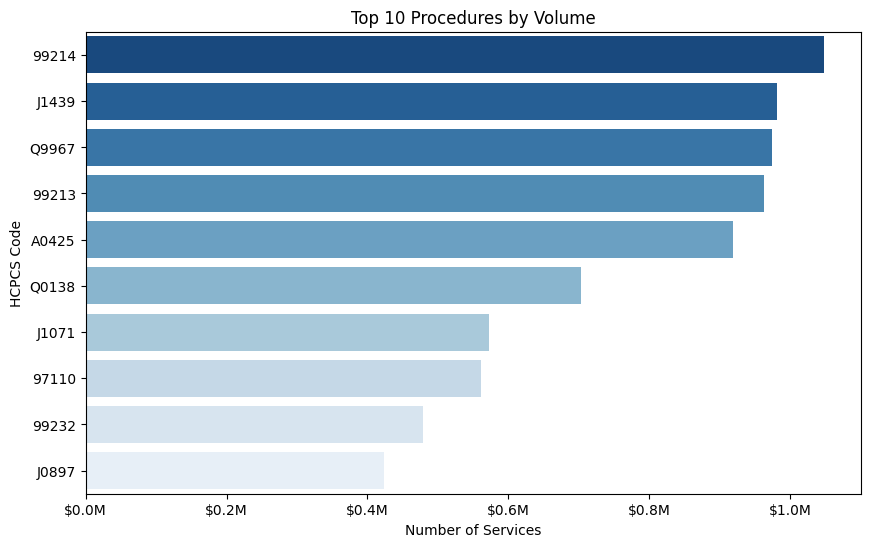

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_procedures.values, y=top_procedures.index, palette="Blues_r")
plt.title("Top 10 Procedures by Volume")
plt.xlabel("Number of Services")
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"${x/1e6:.1f}M"))
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_12240\1330148585.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_procedures.values, y=top_procedures.index, palette="Blues_r")


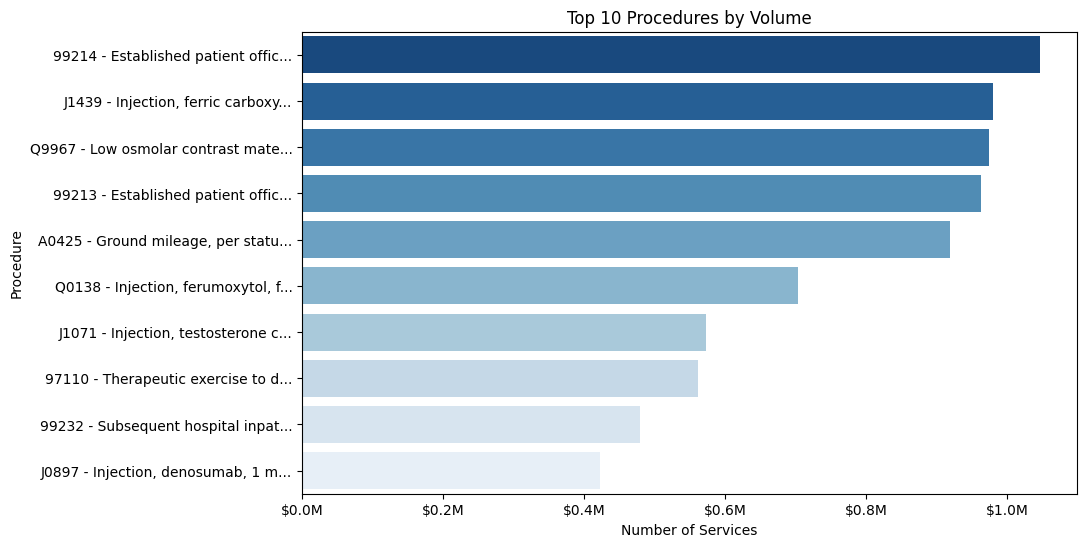

In [14]:
# Truncate description and combine with code
data['Procedure Label'] = data['HCPCS Code'].astype(str) + " - " + data['HCPCS Description'].str.slice(0, 25) + "..."

# Re-aggregate
top_procedures = (
    data.groupby('Procedure Label')['Number of Services']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_procedures.values, y=top_procedures.index, palette="Blues_r")
plt.title("Top 10 Procedures by Volume")
plt.xlabel("Number of Services")
plt.ylabel("Procedure")
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"${x/1e6:.1f}M"))
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_12240\3065204014.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gap_by_type.values, y=gap_by_type.index, palette="coolwarm")


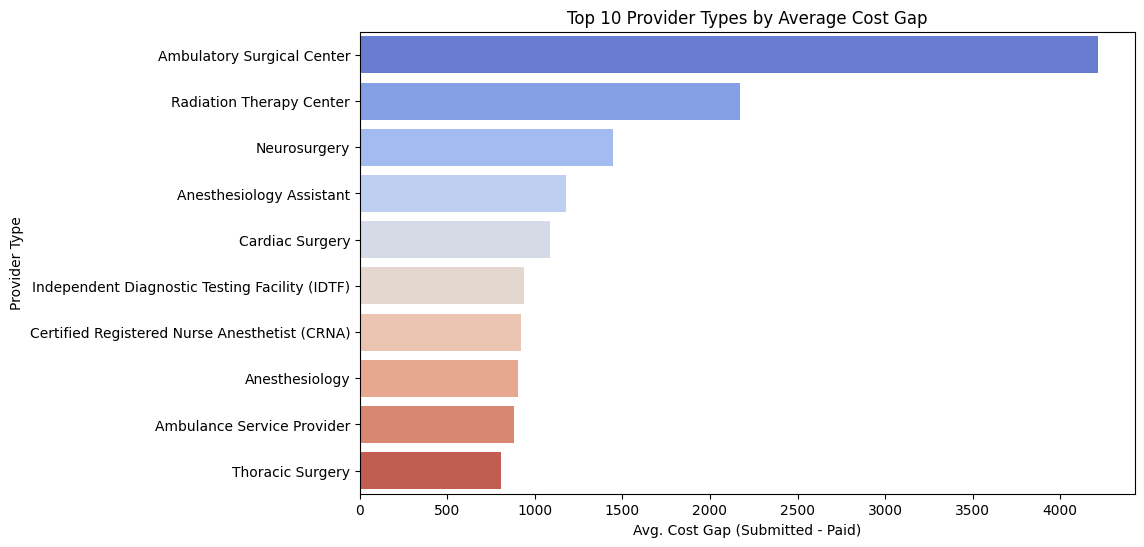

In [16]:
# Average Cost Gap by Provider Type (where reimbursement is lowest compared to billing)
gap_by_type = (
    data.groupby('Provider Type')['Average Cost Gap']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
sns.barplot(x=gap_by_type.values, y=gap_by_type.index, palette="coolwarm")
plt.title("Top 10 Provider Types by Average Cost Gap")
plt.xlabel("Avg. Cost Gap (Submitted - Paid)")
plt.show()

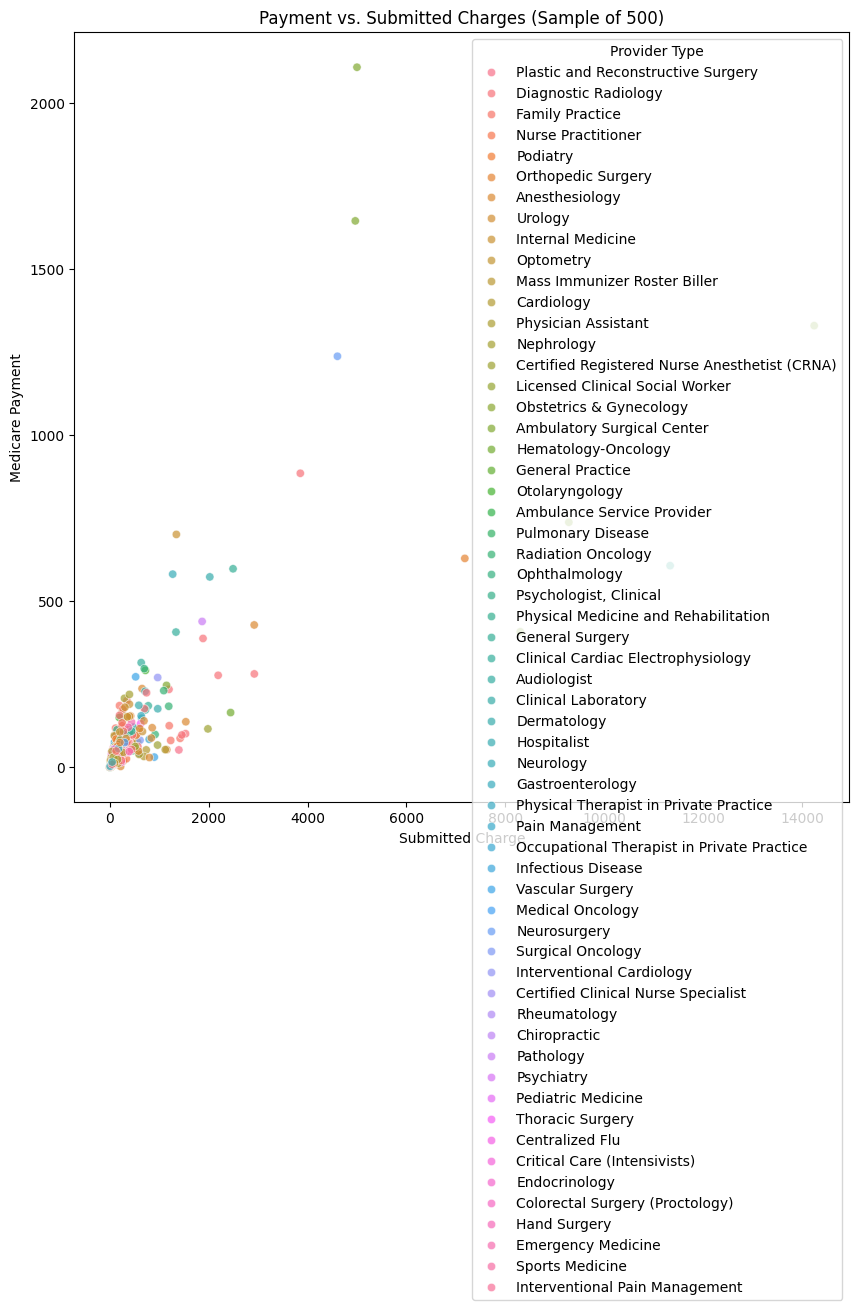

In [17]:
# Scatterplot: How much providers bill vs. how much Medicare pays
plt.figure(figsize=(10,10))
sns.scatterplot(
    x='Average Submitted Charge Amount',
    y='Average Medicare Payment Amount',
    hue='Provider Type',
    data=data.sample(500),  # sample for easier visualization
    alpha=0.7
)
plt.title("Payment vs. Submitted Charges (Sample of 500)")
plt.xlabel("Submitted Charge")
plt.ylabel("Medicare Payment")
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_12240\1849489511.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_specialties. values, y=top_specialties.index, palette="coolwarm")


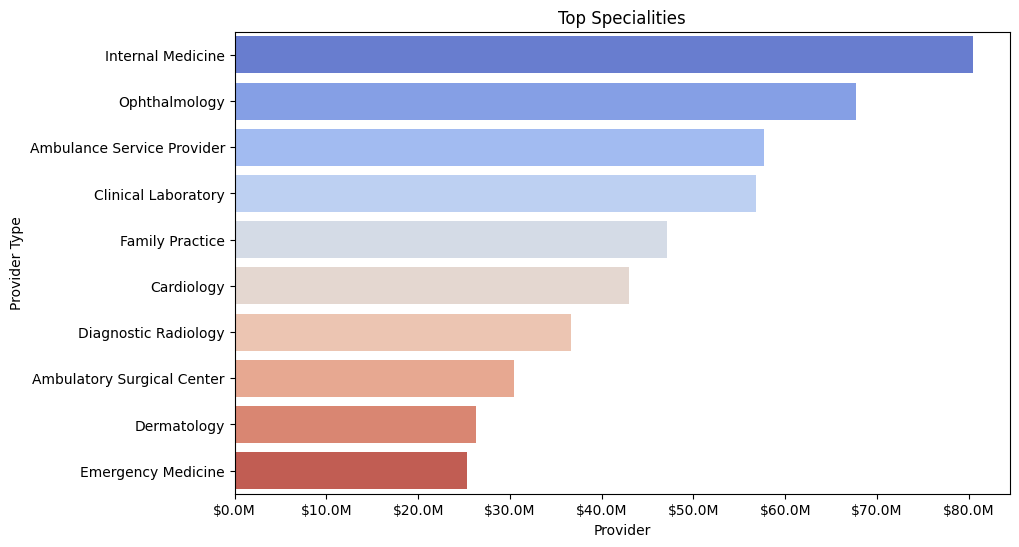

In [18]:
#top sepacilities
top_specialties = (
    data.groupby("Provider Type")["Total Medicare Payment"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
sns.barplot(x=top_specialties. values, y=top_specialties.index, palette="coolwarm")
plt.title("Top Specialities")
plt.xlabel("Provider")
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"${x/1e6:.1f}M"))
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_12240\1122598873.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_patient_costs.values, y=top_patient_costs.index, palette="Purples_r")


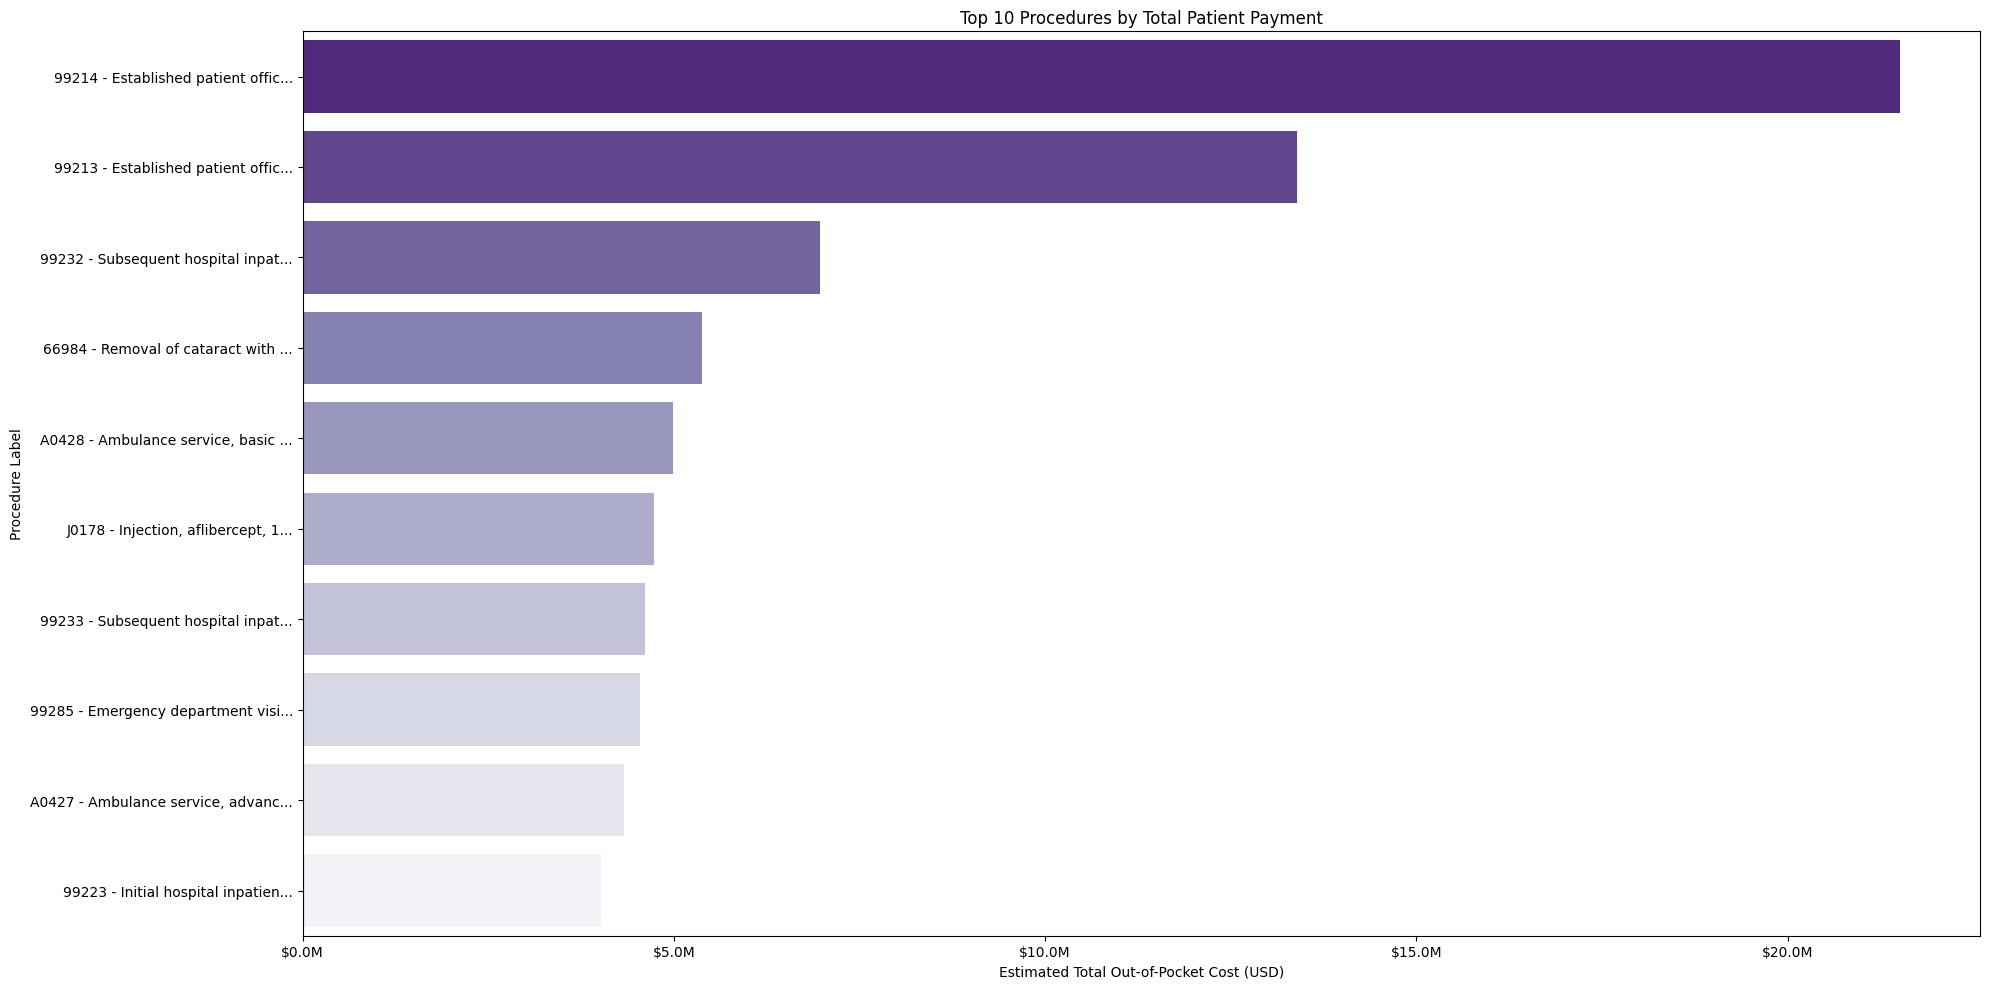

In [19]:
#Estimated Patient Responsibility
data["Estimated Patient Payment"] = (data["Average Medicare Allowed Amount"] * 0.2).round(2)

data["Total Patient Payment"] = data["Estimated Patient Payment"] * data["Number of Services"]

top_patient_costs = (
    data.groupby("Procedure Label")["Total Patient Payment"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)


plt.figure(figsize=(20,10))
sns.barplot(x=top_patient_costs.values, y=top_patient_costs.index, palette="Purples_r")
plt.title("Top 10 Procedures by Total Patient Payment")
plt.xlabel("Estimated Total Out-of-Pocket Cost (USD)")
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"${x/1e6:.1f}M"))
plt.tight_layout()
plt.show()

**Note:**
The "Estimated Patient Payment" is calculated using the standard Medicare Part B coinsurance rate (20% of the allowed amount). Actual patient payments may vary depending on supplemental insurance or other factors.


C:\Users\Dell\AppData\Local\Temp\ipykernel_12240\3819208600.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_payments.values, y=state_payments.index, palette="coolwarm")


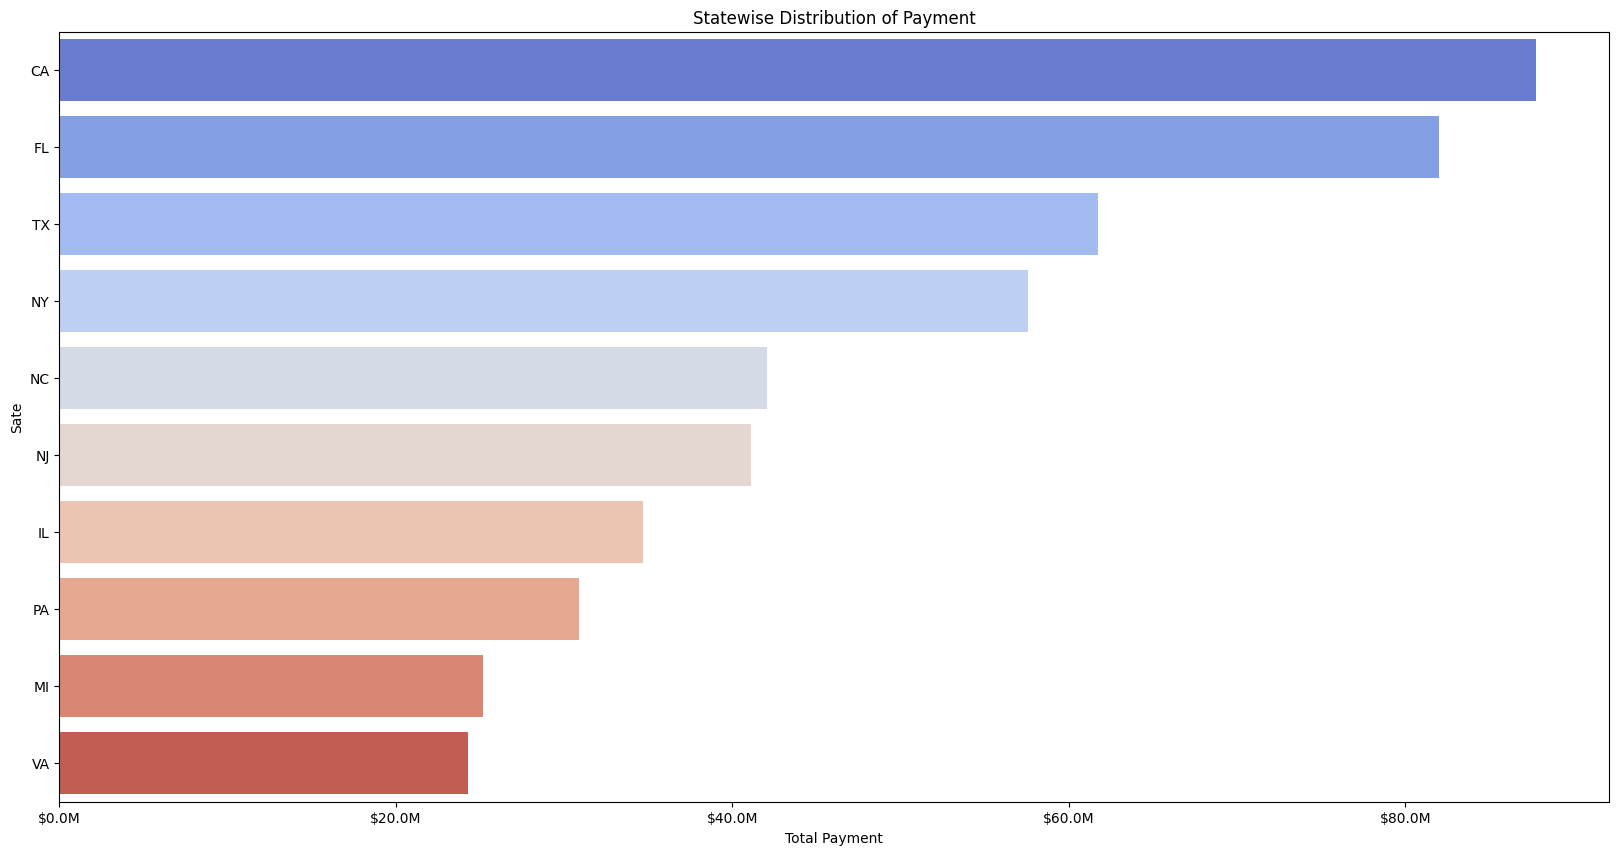

In [20]:
#statewise payment distribution
state_payments = (
    data.groupby("State Code of the Provider")["Total Medicare Payment"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(20,10))
sns.barplot(x=state_payments.values, y=state_payments.index, palette="coolwarm")
plt.title("Statewise Distribution of Payment")
plt.xlabel("Total Payment")
plt.ylabel("Sate")
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"${x/1e6:.1f}M"))
plt.show()
